# LPRNet 车牌识别教程

## 数据集

In [1]:
import os
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

### 测试集

In [2]:
dir_path = './data/test'
test_img_path = os.listdir(dir_path)  # 获取某个文件夹下面的所有文件名

In [3]:
test_img_path[0:3]  # 前三个文件名

['京PL3N67.jpg', '川JK0707.jpg', '川X90621.jpg']

In [4]:
len(test_img_path)  # 图片个数

1000

In [5]:
os.path.join(dir_path, test_img_path[0])  # 把两个字符串拼接成图片的相对路径

'./data/test/京PL3N67.jpg'

In [6]:
os.path.basename('./data/test/京PL3N67.jpg')  # 获取path最后的文件名

'京PL3N67.jpg'

In [7]:
 os.path.splitext('京PL3N67.jpg')  # 拆分得到文件名和后缀名

('京PL3N67', '.jpg')

In [8]:
CHARS = ['京', '沪', '津', '渝', '冀', '晋', '蒙', '辽', '吉', '黑',
         '苏', '浙', '皖', '闽', '赣', '鲁', '豫', '鄂', '湘', '粤',
         '桂', '琼', '川', '贵', '云', '藏', '陕', '甘', '青', '宁',
         '新',
         '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
         'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
         'W', 'X', 'Y', 'Z', '-'
         ]
CHARS_COUNT = {char:0 for char in CHARS}

In [9]:
for path in test_img_path:
    img_name = os.path.splitext(path)[0]
    for c in img_name:
        CHARS_COUNT[c] += img_name.count(c)

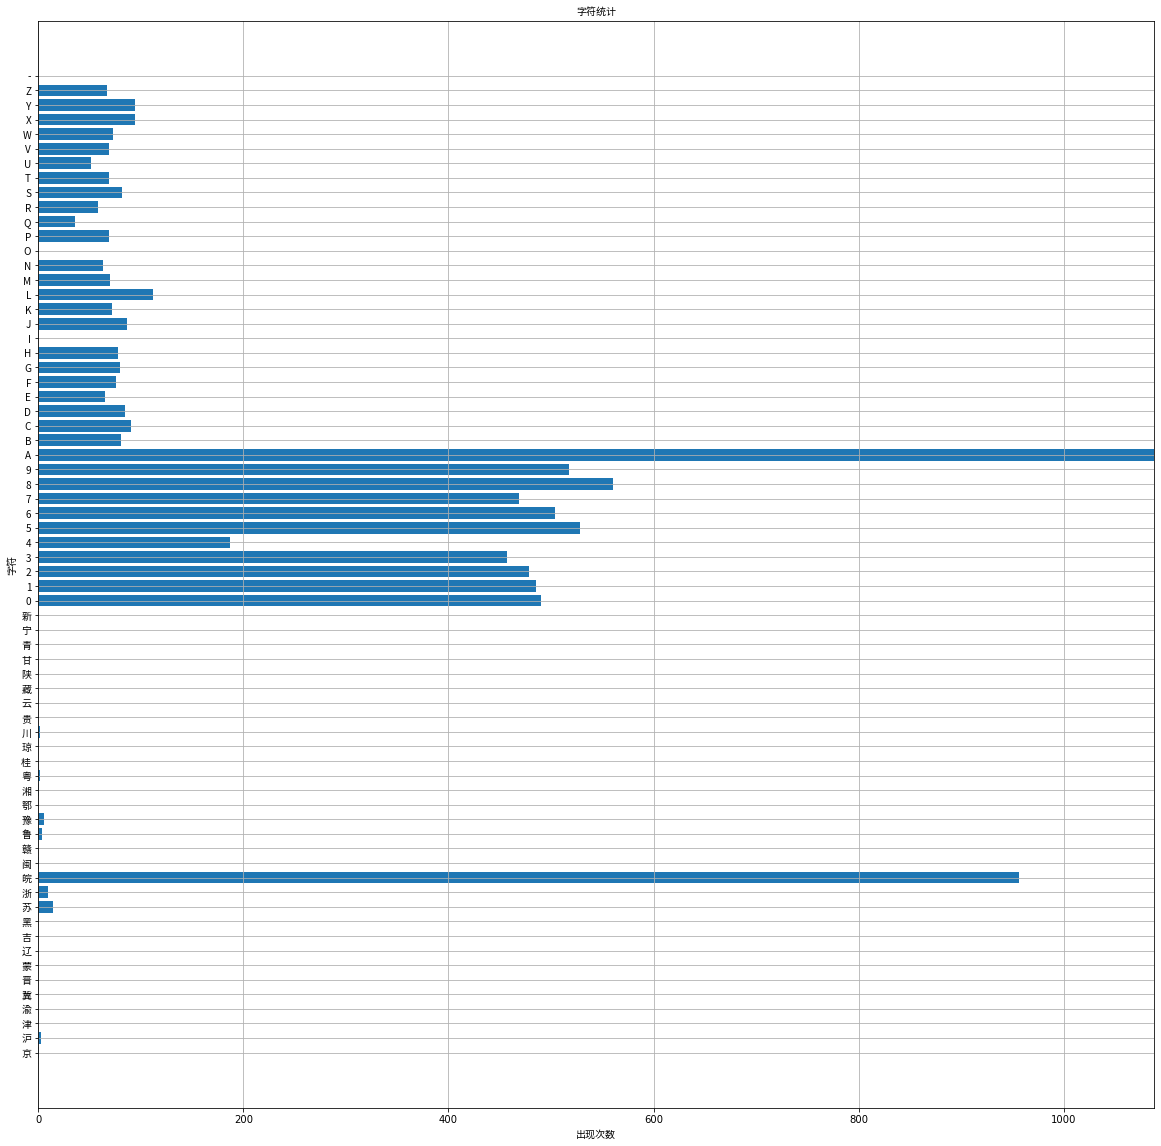

In [10]:
myfont = matplotlib.font_manager.FontProperties(fname=r"./data/NotoSansCJK-Regular.ttc")  # 指定字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.figure(figsize=(20, 20))
plt.barh(range(len(CHARS)), CHARS_COUNT.values())
plt.yticks(range(len(CHARS)), CHARS, fontproperties=myfont)
plt.xlim(0, max(CHARS_COUNT.values()))
plt.title('字符统计', fontproperties=myfont)
plt.xlabel('出现次数', fontproperties=myfont)
plt.ylabel('字符', fontproperties=myfont)
plt.grid()
plt.show()

In [11]:
img = Image.open('./data/test/京PL3N67.jpg')
img.size

(94, 24)

In [12]:
img.show()

### 训练集

训练集是使用中国车牌生成器生成的假车牌，git仓库：<https://gitee.com/leijd/chinese_license_plate_generator.git>，`generate_multi_plate.py`代码里面两个错误：
- 第91行
```python
# font_img = cv2.imread(font_filename, cv2.IMREAD_GRAYSCALE)
            # OpenCV cv2.imread()函数无法读取以中文命名的图像文件，解决方案：
            font_img = cv2.imdecode(np.fromfile(font_filename, dtype=np.uint8), 0)
```

- 第298行
```python
# cv2.imwrite(os.path.join(args.save_adr, '{}_{}_{}.jpg'.format(gt_plate_number, bg_color, is_double)), img)
        # OpenCV cv2.imwrite()函数写入以中文命名的图像文件，解决方案：
        cv2.imencode('.jpg', img)[1].tofile(os.path.join(args.save_adr, '{}_{}_{}.jpg'.format(gt_plate_number, bg_color, is_double)))
```

生成车牌图片命令：
```bash
python generate_multi_plate.py --number 10000 --save-adr train
```

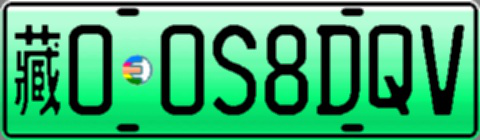

In [13]:
img = Image.open('../chinese_license_plate_generator/train/藏00S8DQV_green_car_False.jpg')
img.show()

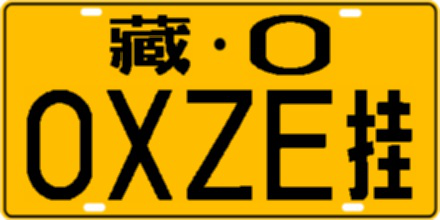

In [14]:
img = Image.open('../chinese_license_plate_generator/train/藏00XZE挂_yellow_True.jpg')
img.show()

In [15]:
img.size

(440, 220)

In [16]:
dir_path = '../chinese_license_plate_generator/train/'
train_img_path = os.listdir(dir_path)  # 获取某个文件夹下面的所有文件名

In [17]:
COLOR = {'black':0, 'blue':0, 'green':0, 'white':0, 'yellow':0}  # 车牌颜色
single, double= 0, 0  # 单层，双层

In [18]:
CHARS = ['京', '沪', '津', '渝', '冀', '晋', '蒙', '辽', '吉', '黑',
         '苏', '浙', '皖', '闽', '赣', '鲁', '豫', '鄂', '湘', '粤',
         '桂', '琼', '川', '贵', '云', '藏', '陕', '甘', '青', '宁',
         '新', '港', '澳', '警', '挂', '使', '领', '学',
         '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
         'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
         'W', 'X', 'Y', 'Z', '-'
         ]
CHARS_COUNT = {char:0 for char in CHARS}

In [19]:
len(CHARS)

75

In [20]:
for path in tqdm(train_img_path):
    img_name = os.path.splitext(path)[0].split('_')
    for c in img_name[0]:
        CHARS_COUNT[c] += img_name[0].count(c)
    for c in COLOR.keys():
        if c in img_name:
            COLOR[c] += 1
    if 'False' in img_name:
        single += 1
    elif 'True' in img_name:
        double += 1

100%|██████████| 10000/10000 [00:00<00:00, 130559.96it/s]


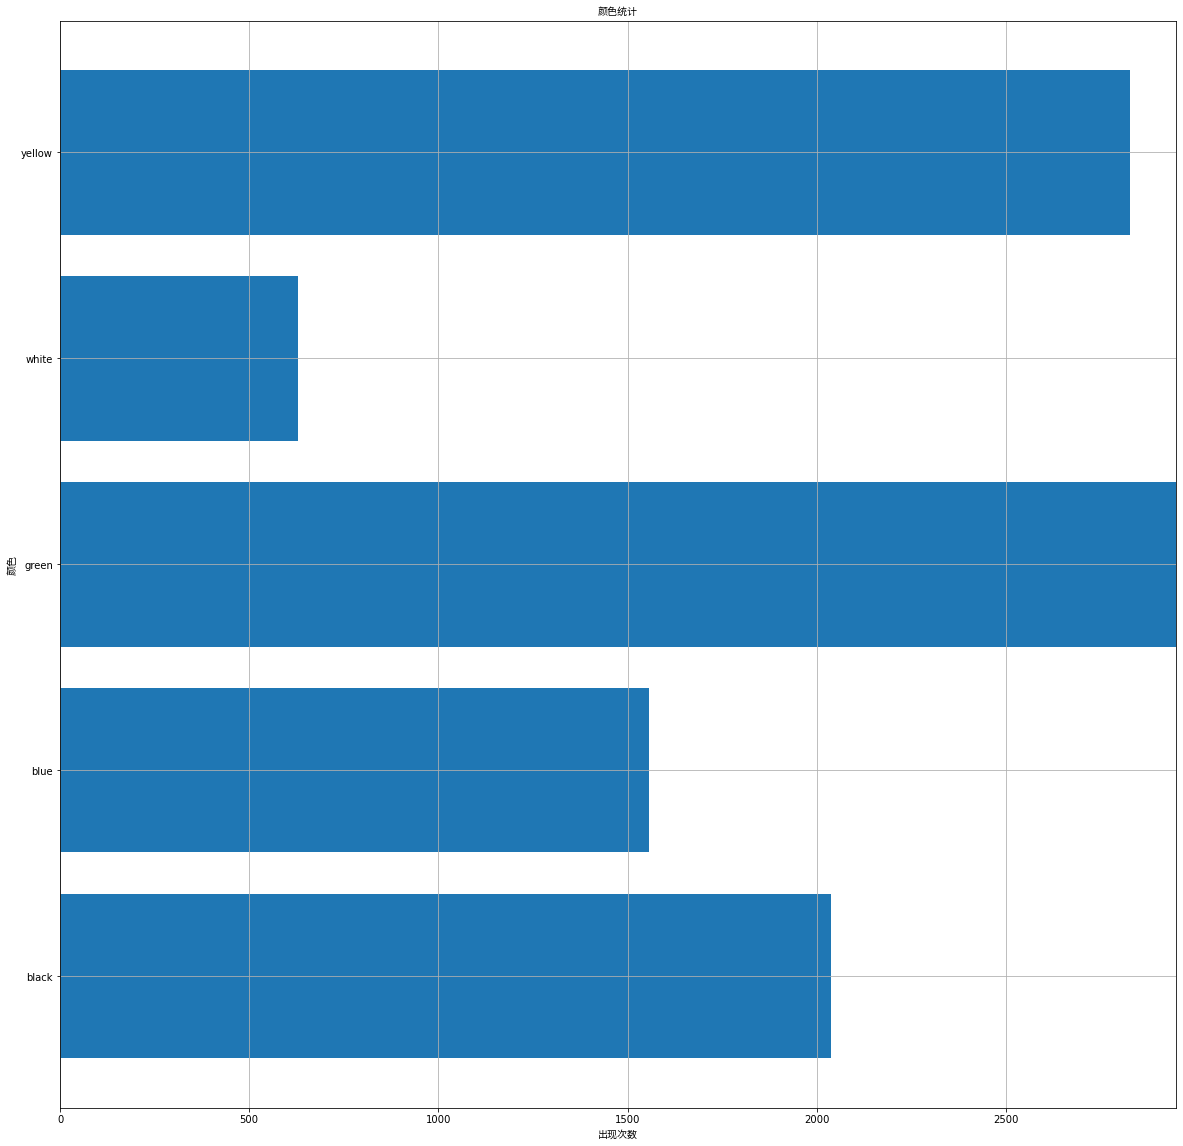

In [21]:
myfont = matplotlib.font_manager.FontProperties(fname=r"./data/NotoSansCJK-Regular.ttc")  # 指定字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.figure(figsize=(20, 20))
plt.barh(range(len(COLOR.keys())), COLOR.values())
plt.yticks(range(len(COLOR.keys())), COLOR.keys())
plt.xlim(0, max(COLOR.values()))
plt.title('颜色统计', fontproperties=myfont)
plt.xlabel('出现次数', fontproperties=myfont)
plt.ylabel('颜色', fontproperties=myfont)
plt.grid()
plt.show()

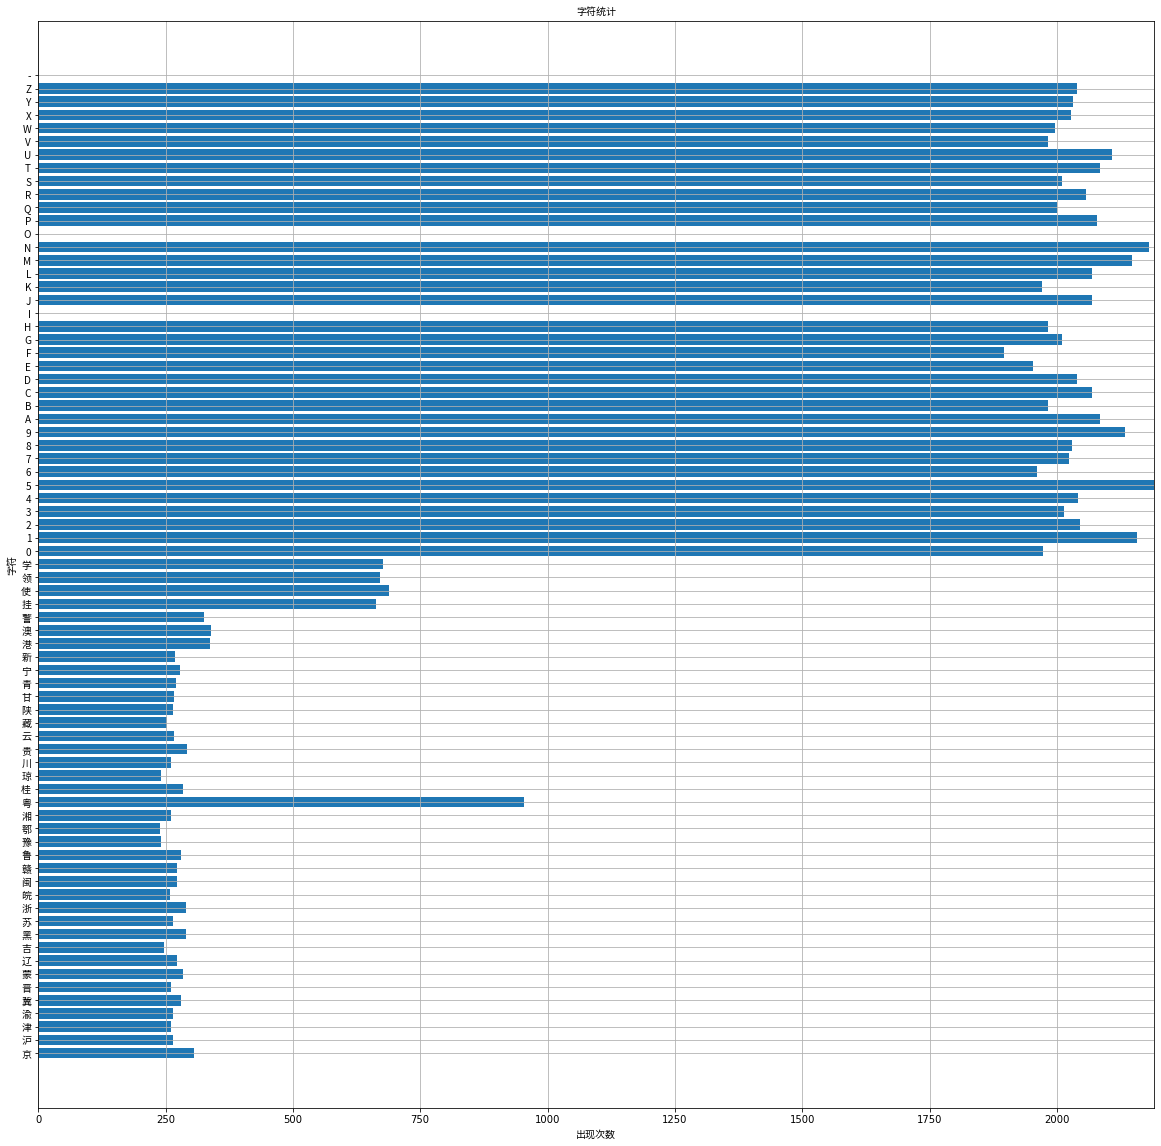

In [22]:
myfont = matplotlib.font_manager.FontProperties(fname=r"./data/NotoSansCJK-Regular.ttc")  # 指定字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.figure(figsize=(20, 20))
plt.barh(range(len(CHARS)), CHARS_COUNT.values())
plt.yticks(range(len(CHARS)), CHARS, fontproperties=myfont)
plt.xlim(0, max(CHARS_COUNT.values()))
plt.title('字符统计', fontproperties=myfont)
plt.xlabel('出现次数', fontproperties=myfont)
plt.ylabel('字符', fontproperties=myfont)
plt.grid()
plt.show()

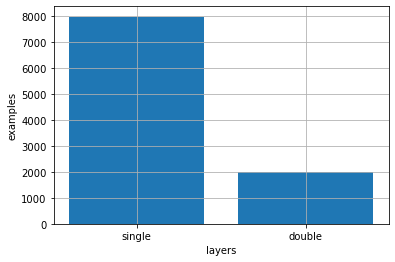

In [23]:
plt.figure()
plt.bar([0, 1], [single, double])
plt.xticks([0,1], ['single', 'double'])
plt.xlabel('layers')
plt.ylabel('examples')
plt.grid()
plt.show()

In [24]:
single, double

(7986, 2014)

### 自定义数据集

In [25]:
from torch.utils.data import Dataset
import random
import cv2
import os

In [26]:
CHARS = ['京', '沪', '津', '渝', '冀', '晋', '蒙', '辽', '吉', '黑',
         '苏', '浙', '皖', '闽', '赣', '鲁', '豫', '鄂', '湘', '粤',
         '桂', '琼', '川', '贵', '云', '藏', '陕', '甘', '青', '宁',
         '新', '港', '澳', '警', '挂', '使', '领', '学',
         '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
         'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
         'W', 'X', 'Y', 'Z', '-'
         ]
CHARS_DICT = {char:i for i, char in enumerate(CHARS)}
len(CHARS)

75

数据增强

In [27]:
# 椒盐噪声
def SaltPepperNoise(src, percetage=0.3):
    h, w, c = src.shape
    SP_NoiseImg = src.copy()
    SP_NoiseNum = int(percetage*h*w)
    for i in range(SP_NoiseNum):
        y = np.random.randint(0, h)
        x = np.random.randint(0, w)
        if random.random() > 0.5:
            SP_NoiseImg[y, x, :] = 0
        else:
            SP_NoiseImg[y, x, :] = 255
    return SP_NoiseImg

# 高斯噪声
def GaussianNoise(src, mean=0, sigma=1, percetage=0.1):
    h, w, c = src.shape
    NoiseImg = src.copy()
    NoiseNum = int(percetage*h*w)
    for i in range(NoiseNum):
        y = np.random.randint(0, h)
        x = np.random.randint(0, w)
        NoiseImg[y, x] = NoiseImg[y, x] + random.gauss(mean, sigma)
        if NoiseImg[y, x].any() < 0:
            NoiseImg[y, x] = 0
        elif NoiseImg[y, x].any() > 255:
            NoiseImg[y, x] = 255
    return NoiseImg

# 旋转
def rotate(image, angle=90, center=None, scale=1.0):
    (h, w) = image.shape[:2]
    if center is None:
        center = (w / 2, h / 2)
    m = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, m, (w, h))
    return rotated

# 左右翻转
def flip(image):
    flipped_image = np.fliplr(image)
    return flipped_image

In [28]:
class LPRDataSet(Dataset):
    def __init__(self, img_dir, imgSize, lpr_max_len, PreprocFun=None, mode='train'):
        self.img_dir = img_dir
        self.img_paths = []
        if type(img_dir) == str:  # 一个路径
            for img_name in os.listdir(img_dir):
                if 'True' not in img_name:  # 只添加单层车牌，带有True的文件名是双层车牌
                    img_name = os.path.join(img_dir, img_name)
                    self.img_paths.append(img_name)
        elif type(img_dir) == list:  # 多个路径
            for dir_path in img_dir:
                for img_name in os.listdir(dir_path):
                    if 'True' not in img_name:  # 只添加单层车牌，带有True的文件名是双层车牌
                        img_name = os.path.join(dir_path, img_name)
                        self.img_paths.append(img_name)
        else:
            print('error in img_dir, img_dir must be str or list')
        random.shuffle(self.img_paths)        # 打乱顺序
        self.img_size = imgSize
        self.lpr_max_len = lpr_max_len
        if PreprocFun is not None:
            self.PreprocFun = PreprocFun
        elif PreprocFun is None and mode == 'train':
            self.PreprocFun = self.train_transform
        elif PreprocFun is None and mode == 'test':
            self.PreprocFun = self.test_transform

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, index):
        filename = self.img_paths[index]
        image = cv2.imread(filename)
        height, width, _ = image.shape
        if width != self.img_size[0] or height != self.img_size[1]:
            image = cv2.resize(image, self.img_size)  # 缩放
        image = self.PreprocFun(image)

        basename = os.path.basename(filename)
        imgname, suffix = os.path.splitext(basename)
        imgname = imgname.split("_")[0]
        label = list()
        for c in imgname:
            label.append(CHARS_DICT[c])

        if len(label) > self.lpr_max_len:
            print(imgname)
            assert 0, "Error label ^~^!!!"

        return image, label, len(label)

    def test_transform(self, img):
        img = img.astype('float32')
        img -= 127.5
        img *= 0.0078125
        # (height, width, channel) -> (channel, height, width) eg:(24,94,3)->(3,24,94) 
        img = np.transpose(img, (2, 0, 1)) 
        return img

    def train_transform(self, img):
        img = img.astype('float32')
        p = random.uniform(0, 0.2)
        # img = SaltPepperNoise(img, p)
        img = GaussianNoise(img, mean=0, sigma=15, percetage=p)
        p = random.randint(0, 5)
        img = rotate(img, p)
        img -= 127.5
        img *= 0.0078125
        # (height, width, channel) -> (channel, height, width) eg:(24,94,3)->(3,24,94) 
        img = np.transpose(img, (2, 0, 1))
        return img

In [29]:
train_data = LPRDataSet('../chinese_license_plate_generator/train/', (94, 24), 8, mode='train')

img, label, length = train_data[6]
image = np.transpose(img, (1, 2, 0)) / 0.0078125 + 127.5
image = image.astype(np.uint8)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = Image.fromarray(image)
image.show()

In [30]:
test_data = LPRDataSet('./data/test/', (94, 24), 8, mode='test')

img, label, length = test_data[6]
image = np.transpose(img, (1, 2, 0)) / 0.0078125 + 127.5
image = image.astype(np.uint8)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = Image.fromarray(image)
image.show()

### 网络结构

输入：96×24的RGB图片 (channel, height, width)=(3, 24, 94)

输出：维度为(classes, 18)的二维数组

|字符|time step 1的概率|time step 2的概率|...|time step 18的概率|
|:-:|:-:|:-:|:-:|:-:|
|粤|0.01|0.05|...|0.9|
|...|...|...|...|...|
|Z|0.4|0.01|...|0.01|
|...|...|...|...|...|
|9|0.2|0.09|...|0.05|

`Connectionist Temporal Classification（CTC）` 

贪婪解码：每个time step内最大概率的字符，同时去除空白字符，即-

In [31]:
import torch
import torch.nn as nn

In [32]:
class small_basic_block(nn.Module):
    def __init__(self, ch_in, ch_out):
        super(small_basic_block, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(ch_in, ch_out // 4, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out // 4, kernel_size=(3, 1), padding=(1, 0)),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out // 4, kernel_size=(1, 3), padding=(0, 1)),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out, kernel_size=1),
        )
    def forward(self, x):
        return self.block(x)

In [33]:
class LPRNet(nn.Module):
    def __init__(self, lpr_max_len, class_num, dropout_rate):
        super(LPRNet, self).__init__()
        self.lpr_max_len = lpr_max_len
        self.class_num = class_num
        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1), # 0
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),  # 2
            nn.MaxPool3d(kernel_size=(1, 3, 3), stride=(1, 1, 1)),
            small_basic_block(ch_in=64, ch_out=128),    # *** 4 ***
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),  # 6
            nn.MaxPool3d(kernel_size=(1, 3, 3), stride=(2, 1, 2)),
            small_basic_block(ch_in=64, ch_out=256),   # 8
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),  # 10
            small_basic_block(ch_in=256, ch_out=256),   # *** 11 ***
            nn.BatchNorm2d(num_features=256),   # 12
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(1, 3, 3), stride=(4, 1, 2)),  # 14
            nn.Dropout(dropout_rate),
            nn.Conv2d(in_channels=64, out_channels=256, kernel_size=(1, 4), stride=1),  # 16
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),  # 18
            nn.Dropout(dropout_rate),
            nn.Conv2d(in_channels=256, out_channels=class_num, kernel_size=(13, 1), stride=1), # 20
            nn.BatchNorm2d(num_features=class_num),
            nn.ReLU(),  # *** 22 ***
        )
        self.container = nn.Sequential(
            nn.Conv2d(in_channels=448+self.class_num, out_channels=self.class_num, kernel_size=(1, 1), stride=(1, 1)),
            # nn.BatchNorm2d(num_features=self.class_num),
            # nn.ReLU(),
            # nn.Conv2d(in_channels=self.class_num, out_channels=self.lpr_max_len+1, kernel_size=3, stride=2),
            # nn.ReLU(),
        )

    def forward(self, x):
        keep_features = list()
        for i, layer in enumerate(self.backbone.children()):
            x = layer(x)
            if i in [2, 6, 13, 22]: # [2, 4, 8, 11, 22]
                keep_features.append(x)

        global_context = list()
        for i, f in enumerate(keep_features):
            if i in [0, 1]:
                f = nn.AvgPool2d(kernel_size=5, stride=5)(f)
            if i in [2]:
                f = nn.AvgPool2d(kernel_size=(4, 10), stride=(4, 2))(f)
            f_pow = torch.pow(f, 2)
            f_mean = torch.mean(f_pow)
            f = torch.div(f, f_mean)
            global_context.append(f)

        x = torch.cat(global_context, 1)
        x = self.container(x)
        logits = torch.mean(x, dim=2)

        return logits

测试网络的正确性

In [34]:
model = LPRNet(lpr_max_len=8, class_num=len(CHARS), dropout_rate=0.5)
print(model)

LPRNet(
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool3d(kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=0, dilation=1, ceil_mode=False)
    (4): small_basic_block(
      (block): Sequential(
        (0): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
        (1): ReLU()
        (2): Conv2d(32, 32, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0))
        (3): ReLU()
        (4): Conv2d(32, 32, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
        (5): ReLU()
        (6): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool3d(kernel_size=(1, 3, 3), stride=(2, 1, 2), padding=0, dilation=1, ceil_mode=False)
    (8): small_basic_block(
      (block): Sequential(
        (0): Conv2d(64, 64, 

In [35]:
model.eval()  # 开启测试模式
pic = torch.ones(size=(2, 3, 24, 94))  # 2张3@24×94的图片张量
output = model(pic).cpu().detach().numpy()
print(output, '\n', output.shape)

[[[ -8.270824   -8.370071   -8.370213  ...  -8.370213   -8.370213
    -8.329154 ]
  [ -2.551096   -2.6152215  -2.6151469 ...  -2.6151469  -2.6151469
    -2.7369812]
  [ 24.394527   24.606      24.606077  ...  24.606077   24.606077
    24.63611  ]
  ...
  [  4.936816    4.7899585   4.789992  ...   4.789992    4.789992
     4.848535 ]
  [-22.082272  -22.118895  -22.118917  ... -22.118917  -22.118917
   -22.289669 ]
  [ -1.9641039  -2.1117845  -2.1118174 ...  -2.1118174  -2.1118174
    -2.1100614]]

 [[ -8.270824   -8.370071   -8.370213  ...  -8.370213   -8.370213
    -8.329154 ]
  [ -2.551096   -2.6152215  -2.6151469 ...  -2.6151469  -2.6151469
    -2.7369812]
  [ 24.394527   24.606      24.606077  ...  24.606077   24.606077
    24.63611  ]
  ...
  [  4.936816    4.7899585   4.789992  ...   4.789992    4.789992
     4.848535 ]
  [-22.082272  -22.118895  -22.118917  ... -22.118917  -22.118917
   -22.289669 ]
  [ -1.9641039  -2.1117845  -2.1118174 ...  -2.1118174  -2.1118174
    -2.1100614

使用`greedy decode`对`CTC(Connectionist Temporal Classification)`解码

In [36]:
def greedy_decode(preds, pred_char=False):
    last_chars_idx = len(CHARS) - 1

    # 贪婪解码 (greedy decode)
    pred_labels = []
    for i in range(preds.shape[0]):
        pred = preds[i, :, :]  # 第i张图片对应的结果，即维度为(66, 18)的二维数组
        pred_label = []
        for j in range(pred.shape[1]):  # 遍历每一列，找到每一列最大值的索引（index）
            pred_label.append(np.argmax(pred[:, j], axis=0))
        no_repeat_blank_label = []
        pre_c = -1
        for c in pred_label:  # 合并重复的索引值部分，删除空白标签，即为-1的值(dropout repeate label and blank label)
            if (pre_c == c) or (c == last_chars_idx):
                if c == last_chars_idx:
                    pre_c = c
                continue
            no_repeat_blank_label.append(c)
            pre_c = c
        pred_labels.append(no_repeat_blank_label)

    # 解码成字符串
    if pred_char:
        labels = []
        for label in pred_labels:
            lb = ""
            for i in label:
                lb += CHARS[i]
            labels.append(lb)
        return pred_labels, labels
    else:
        return pred_labels

In [37]:
greedy_decode(output)

[[15], [15]]

### 训练

In [38]:
from torch import optim
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

创建数据集

In [39]:
# ['../chinese_license_plate_generator/train/', './data/test/']
train_data = LPRDataSet(['../chinese_license_plate_generator/train/', './data/test/'], (94, 24), 8, mode='train')
test_data = LPRDataSet('./data/test/', (94, 24), 8, mode='test')
model = LPRNet(lpr_max_len=8, class_num=len(CHARS), dropout_rate=0.5)

创建网络

In [41]:
model = LPRNet(lpr_max_len=8, class_num=len(CHARS), dropout_rate=0.5)

In [42]:
epoch = 10

# 损失函数 reduction: 'none' | 'mean' | 'sum'
ctc_loss = nn.CTCLoss(blank=len(CHARS)-1, reduction='mean')

# 优化器
optimizer = optim.Adam(
    model.parameters(),
    lr=0.001
)

# cpu训练还是GPU训练
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('using ', device)
model = model.to(device)

# tensorboard
log_folder = "./logs"
if not os.path.exists(log_folder):
    os.mkdir(log_folder)
writer = SummaryWriter(log_dir=log_folder)

# 模型保存路径
save_folder = './weights'
if not os.path.exists(save_folder):
    os.mkdir(save_folder)

using  cpu


In [43]:
def collate_fn(batch):
    imgs = []
    labels = []
    lengths = []
    for sample in batch:
        img, label, length = sample
        imgs.append(torch.from_numpy(img))
        # imgs.append(img)
        labels.extend(label)
        lengths.append(length)
    labels = np.asarray(labels).flatten().astype(np.int32)
    return (torch.stack(imgs, 0), torch.from_numpy(labels), lengths)


# 利用DataLoader加载数据集
batch_size = 64
train_loader = DataLoader(dataset=train_data, batch_size=batch_size,
                          shuffle=True, drop_last=True, collate_fn=collate_fn)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size,
                         shuffle=True, drop_last=True, collate_fn=collate_fn)

In [44]:
def sparse_tuple_for_ctc(T_length=18, lengths=8):
    # T_length = lpr_max_len
    input_lengths = []
    target_lengths = []

    for ch in lengths:
        input_lengths.append(T_length)
        target_lengths.append(ch)

    return tuple(input_lengths), tuple(target_lengths)

In [45]:
# 训练和测试
verbose_step = 100
total_train_step = 0  # 记录训练次数
total_test_step = 0   # 记录测试次数
acc = 0
for i in range(epoch):
    print("-----第{}轮训练开始-----".format(i+1))

    # 训练
    model.train()  # 开启训练模式
    for images, labels, lengths in train_loader:
        # get ctc parameters
        input_lengths, target_lengths = sparse_tuple_for_ctc(lengths=lengths)
        # forward
        images = images.to(device)
        logits = model(images)
        log_probs = logits.permute(2, 0, 1) # for ctc loss: T x N x C
        log_probs = log_probs.log_softmax(2).requires_grad_()
        # backprop
        optimizer.zero_grad()  # 优化器中的参数梯度归零
        loss = ctc_loss(log_probs, labels, input_lengths=input_lengths, target_lengths=target_lengths)
        if loss.item() == np.inf:  # 如果梯度爆炸
            continue
        loss.backward()        # 反向传播，计算梯度
        optimizer.step()       # 优化网络
        # 记录loss
        if total_train_step % verbose_step == 0:  # 每verbose_step个batch，显示信息
            print("训练次数：{}，loss：{}".format(total_train_step, loss.item()))
            writer.add_scalar("train_loss", loss.item(), total_train_step)
            writer.add_images("Epoch_{}".format(epoch), images, total_train_step)
        total_train_step += 1

    # 测试
    model.eval()  # 关闭dropout
    total_test_loss = 0
    total_acc_num = 0
    Tp, Tn = 0.0, 0.0
    with torch.no_grad():  # 关闭梯度计算
        for images, labels, lengths in test_loader:
            # labels: 1D -> 2D
            targets = []
            start = 0
            for length in lengths:
                label = labels[start:start+length]
                targets.append(label.tolist())
                start += length
            # forward
            images = images.to(device)
            prebs = model(images)
            prebs = prebs.cpu().detach().numpy()
            # greedy decode
            preb_labels = greedy_decode(prebs)
            # calculate
            for i, label in enumerate(preb_labels):
                if len(label) != len(targets[i]):  # 长度不一致
                    Tn += 1
                    continue
                if targets[i] == label:
                    Tp += 1
                else:
                    Tn += 1
        total_test_acc = float(Tp) / float(Tp + Tn)
        print("整体测试集上的acc: {}".format(total_test_acc))
        writer.add_scalar("test_acc", total_test_acc, total_test_step)
        total_test_step += 1

    # 保存模型参数
    if total_test_acc >= acc:  # 保存最好的
        acc = total_test_acc
        model_path = save_folder + "/demo.pth"
        torch.save(model.state_dict(), model_path)
        print("模型已保存")

writer.close()

-----第1轮训练开始-----
训练次数：0，loss：9.210077285766602
训练次数：100，loss：3.279574394226074
整体测试集上的acc: 0.005208333333333333
模型已保存
-----第2轮训练开始-----
训练次数：200，loss：0.5523087382316589
整体测试集上的acc: 0.28229166666666666
模型已保存
-----第3轮训练开始-----
训练次数：300，loss：0.20345884561538696
训练次数：400，loss：0.06951308995485306
整体测试集上的acc: 0.56875
模型已保存
-----第4轮训练开始-----
训练次数：500，loss：0.0902351438999176
整体测试集上的acc: 0.603125
模型已保存
-----第5轮训练开始-----
训练次数：600，loss：0.04255086928606033
整体测试集上的acc: 0.6447916666666667
模型已保存
-----第6轮训练开始-----
训练次数：700，loss：0.013804489746689796
训练次数：800，loss：0.01415854599326849
整体测试集上的acc: 0.6875
模型已保存
-----第7轮训练开始-----
训练次数：900，loss：0.05820710211992264
整体测试集上的acc: 0.7333333333333333
模型已保存
-----第8轮训练开始-----
训练次数：1000，loss：0.039369672536849976
训练次数：1100，loss：0.02302633784711361
整体测试集上的acc: 0.7510416666666667
模型已保存
-----第9轮训练开始-----
训练次数：1200，loss：0.06149817258119583
整体测试集上的acc: 0.7177083333333333
-----第10轮训练开始-----
训练次数：1300，loss：0.037400223314762115
整体测试集上的acc: 0.76875
模型已保存


在命令行查看训练结果：
```bash
tensorboard --logdir=logs
```

In [ ]:
%load_ext tensorboard

In [ ]:
!tensorboard --logdir=logs

### 测试

In [ ]:
CHARS = ['京', '沪', '津', '渝', '冀', '晋', '蒙', '辽', '吉', '黑',
         '苏', '浙', '皖', '闽', '赣', '鲁', '豫', '鄂', '湘', '粤',
         '桂', '琼', '川', '贵', '云', '藏', '陕', '甘', '青', '宁',
         '新', '港', '澳', '警', '挂', '使', '领', '学',
         '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
         'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
         'W', 'X', 'Y', 'Z', '-'
         ]

In [ ]:
model = LPRNet(lpr_max_len=8, class_num=len(CHARS), dropout_rate=0.5)  # 建立模型

In [ ]:
path = './weights/demo.pth'  # ./weights/LPR_mix.pth ./weights/LPR_demo.pth
# 使用map_location，防止GPU训练的模型导入到CPU上测试会出错
dic = torch.load(path, map_location=torch.device("cpu"))

In [ ]:
model.load_state_dict(dic)

In [46]:
# file_path = '../chinese_license_plate_generator/train/藏00S8DQV_green_car_False.jpg'
file_path = './data/test/皖A7E070.jpg'
image = cv2.imread(file_path)
height, width, _ = image.shape
if width != 94 or height != 24:
    image = cv2.resize(image, (94, 24))  # 缩放

In [47]:
# 查看图片
img = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
img.show()

In [48]:
image = image.astype('float32')
# (height, width, channel) -> (channel, height, width) eg:(24,94,3)->(3,24,94) 
image = np.transpose(image, (2, 0, 1))
# 归一化
image = image / 255.0
# 改变shape
image = image.reshape(1, 3, 24, 94)

In [49]:
# 单张图片的情况下
image = torch.from_numpy(image)
image.shape

torch.Size([1, 3, 24, 94])

In [50]:
model.eval()
with torch.no_grad():
    output = model(image)
    output = output.cpu().detach().numpy()
    labels_idx, labels = greedy_decode(output, True)
    print(labels_idx, labels)

[[12, 48, 45, 52, 38, 45, 38]] ['皖A7E070']


In [51]:
# 多张图片的情况下
images = np.concatenate([image, image, image], axis=0)
images.shape

(3, 3, 24, 94)

In [52]:
images = torch.from_numpy(images)
images.shape

torch.Size([3, 3, 24, 94])

In [54]:
model.eval()
with torch.no_grad():
    output = model(images)
    output = output.cpu().detach().numpy()
    labels_idx, labels = greedy_decode(output, True)
    print(labels_idx, labels)

[[12, 48, 45, 52, 38, 45, 38], [12, 48, 45, 52, 38, 45, 38], [12, 48, 45, 52, 38, 45, 38]] ['皖A7E070', '皖A7E070', '皖A7E070']


### 网络性能评估